# Confusion Matrix

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [143]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [144]:
x = df.iloc[:,:-1]
y = df['placed']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [147]:
from sklearn.linear_model import LogisticRegression

In [148]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [149]:
lr.score(x_test,y_test)*100

52.5

* Here we can use xgboost model for increase accuracy

In [150]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(x_train, y_train)
print(xgb.score(x_test, y_test) * 100)


55.50000000000001


* Now we are see confussion matrix 

In [151]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [152]:
cf=confusion_matrix(y_test,xgb.predict(x_test))
cf

array([[55, 52],
       [37, 56]])

* This is the confusion matrix. now we can see Graphicaly.

<Axes: >

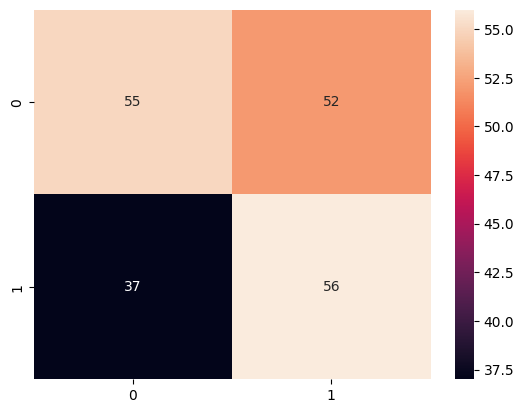

In [153]:
sns.heatmap(cf,annot=True)

* now we find Precision, recall and f1_score

In [154]:
precision_score(y_test,xgb.predict(x_test))*100

51.85185185185185

In [155]:
recall_score(y_test,xgb.predict(x_test))*100

60.215053763440864

In [156]:
f1_score(y_test,xgb.predict(x_test))*100

55.72139303482587

In [162]:
y_proba = xgb.predict_proba(x_test)[:, 1]
y_pred_custom = (y_proba >= 0.3).astype(int)  # 0.4 threshold
recall_score(y_test, y_pred_custom) * 100


75.26881720430107